In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Merge CSV files:
path = '../data/proximity-measurements'
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

dataframes = []
for file in csv_files:
    df = pd.read_csv(os.path.join(path, file))
    df.drop('Unnamed: 0', axis=1, inplace=True)
    df.columns = [file.split('.')[0]]
    dataframes.append(df)

merged_df = pd.concat(dataframes, axis=1)

merged_file_path = '../data/proximity-measurements.csv'
merged_df.to_csv(merged_file_path, index=False)

In [3]:
merged_df.head()

,05cm_dark,05cm_light,05cm_normal,05cm_shadow,10cm_dark,10cm_light,10cm_normal,10cm_shadow,20cm_dark,20cm_light,20cm_normal,20cm_shadow,30cm_dark,30cm_light,30cm_normal,30cm_shadow,37cm_dark,37cm_light,37cm_normal,37cm_shadow
0,60.0,53.0,54.0,51.0,108.0,107.0,108.0,107.0,217.0,211.0,208.0,212.0,316.0,319.0,316.0,314.0,377.0,382.0,370.0,375.0
1,60.0,54.0,56.0,57.0,108.0,107.0,109.0,108.0,219.0,213.0,209.0,214.0,314.0,312.0,313.0,314.0,375.0,371.0,367.0,377.0
2,61.0,55.0,55.0,54.0,107.0,109.0,106.0,111.0,215.0,213.0,209.0,216.0,313.0,315.0,317.0,315.0,371.0,373.0,373.0,374.0
3,60.0,54.0,54.0,55.0,109.0,106.0,105.0,111.0,221.0,212.0,209.0,213.0,314.0,315.0,316.0,312.0,378.0,370.0,373.0,370.0
4,63.0,52.0,54.0,56.0,106.0,107.0,108.0,108.0,218.0,213.0,212.0,210.0,321.0,310.0,313.0,313.0,368.0,374.0,370.0,373.0


In [8]:
file_path = '../data/proximity-measurements.csv'
data = pd.read_csv(file_path, delimiter=',')

if not os.path.exists('../plots'):
    os.makedirs('../plots')

In [ ]:
# Calculate and print mean and variance for each column
means = data.mean()
variances = data.var()

In [28]:
axes = means.axes[0].to_list()
pd.DataFrame({'Mean':means, 'Variance':variances}, index=axes)

,Mean,Variance
05cm_dark,60.968,2.463904
05cm_light,53.336,2.435976
05cm_normal,54.736,3.517339
05cm_shadow,53.524,2.338100
10cm_dark,108.790,2.398697
10cm_light,107.404,2.441667
10cm_normal,106.546,2.264413
10cm_shadow,108.176,2.610244
20cm_dark,219.082,4.055387
20cm_light,211.348,3.870637


In [31]:
pd.DataFrame({'Mean':means, 'Variance':variances}, index=axes).T

,05cm_dark,05cm_light,05cm_normal,05cm_shadow,10cm_dark,10cm_light,10cm_normal,10cm_shadow,20cm_dark,20cm_light,20cm_normal,20cm_shadow,30cm_dark,30cm_light,30cm_normal,30cm_shadow,37cm_dark,37cm_light,37cm_normal,37cm_shadow
Mean,60.968000,53.336000,54.736000,53.5240,108.790000,107.404000,106.546000,108.176000,219.082000,211.348000,211.082000,213.848000,316.566000,313.216000,312.548000,313.030000,372.818000,376.582000,370.918000,373.452000
Variance,2.463904,2.435976,3.517339,2.3381,2.398697,2.441667,2.264413,2.610244,4.055387,3.870637,4.011299,3.832561,7.103852,8.710766,9.302301,9.147395,10.449776,20.440156,18.840958,13.819335


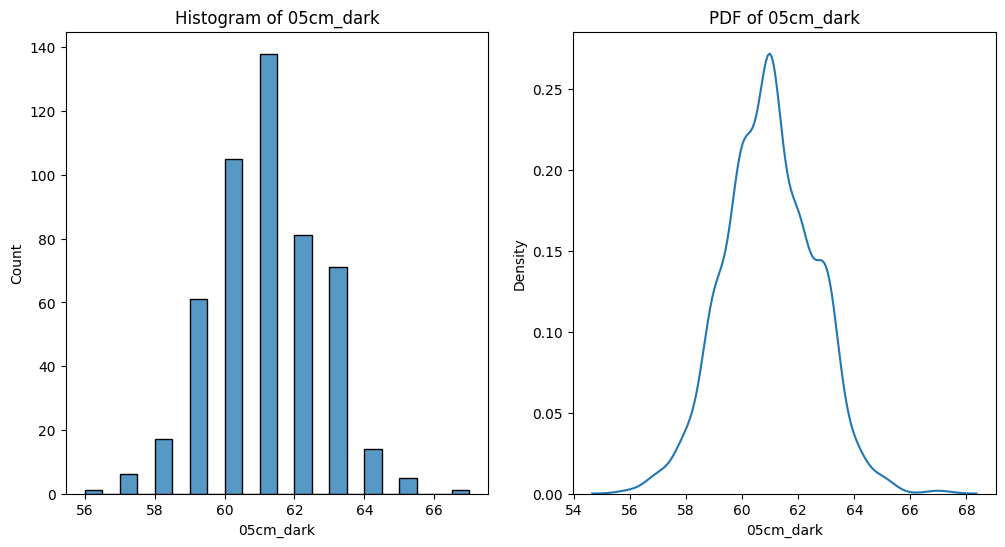

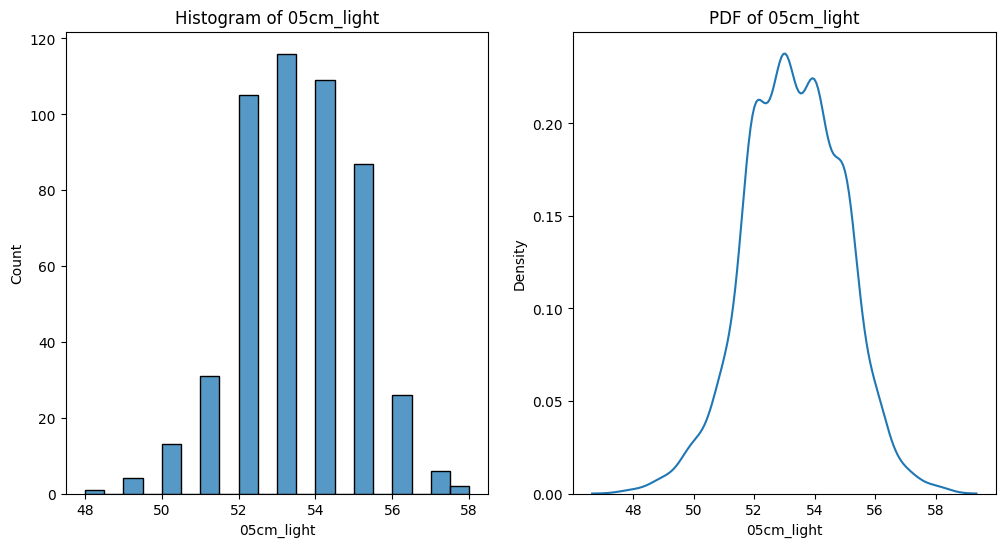

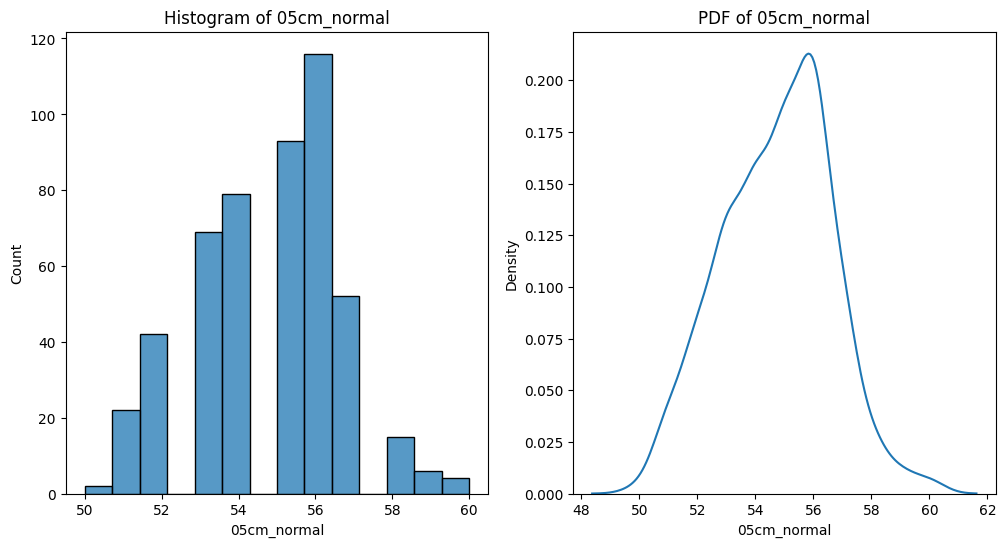

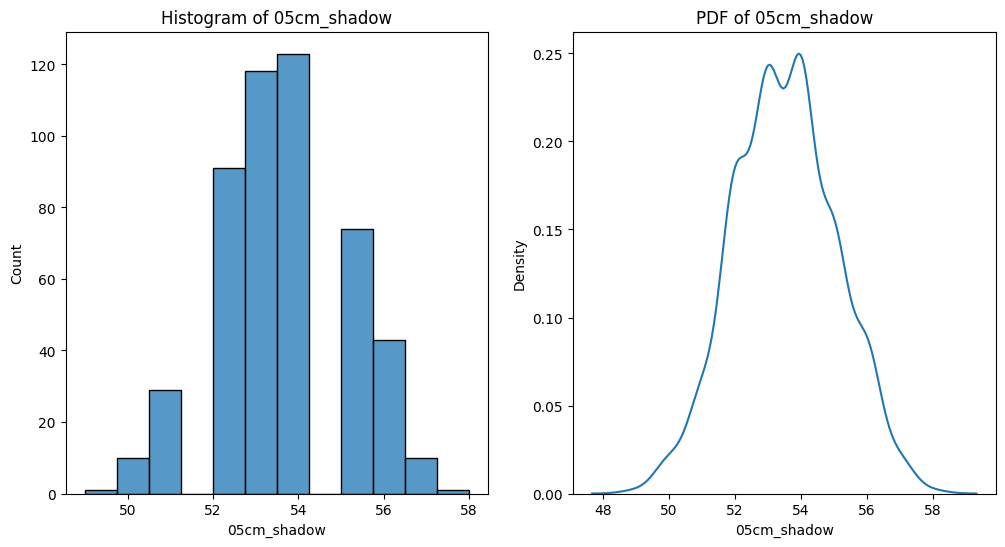

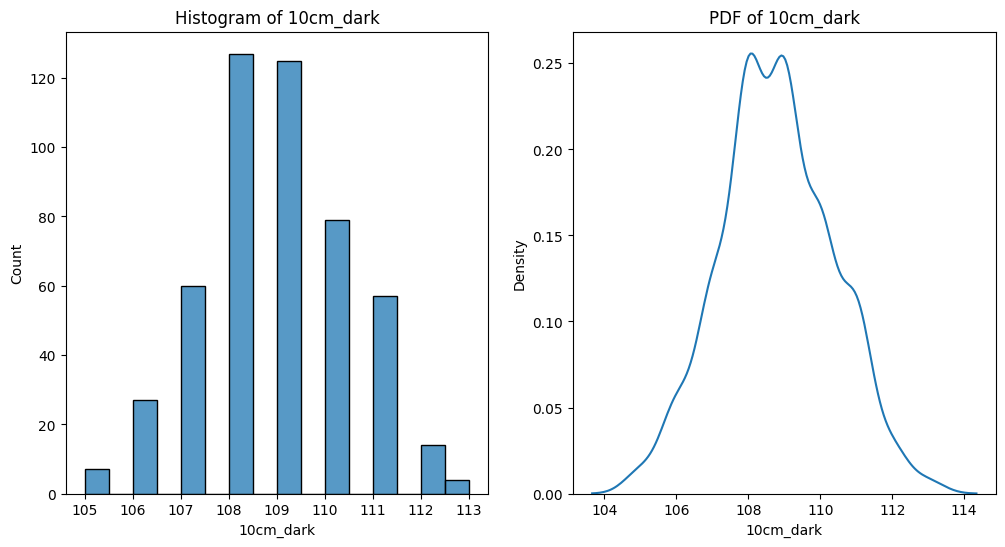

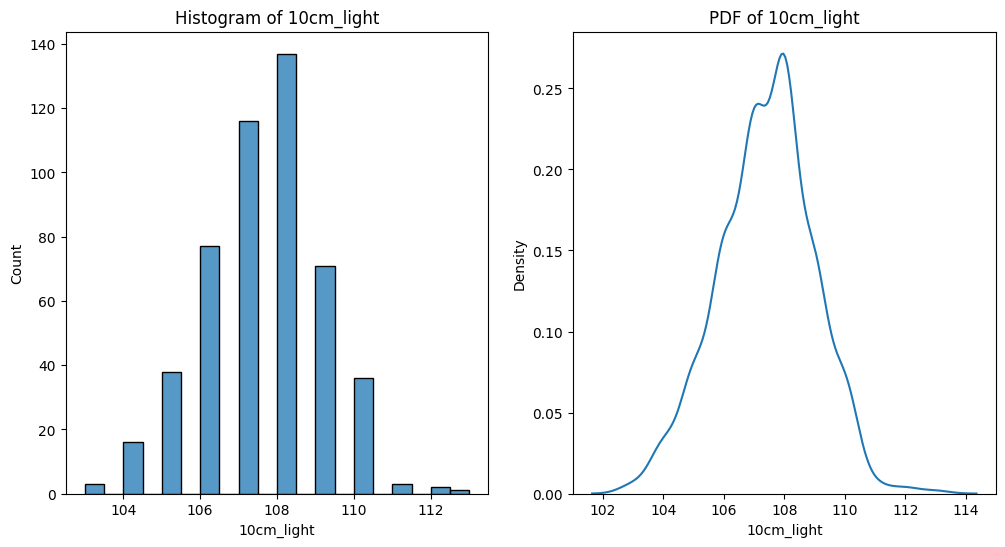

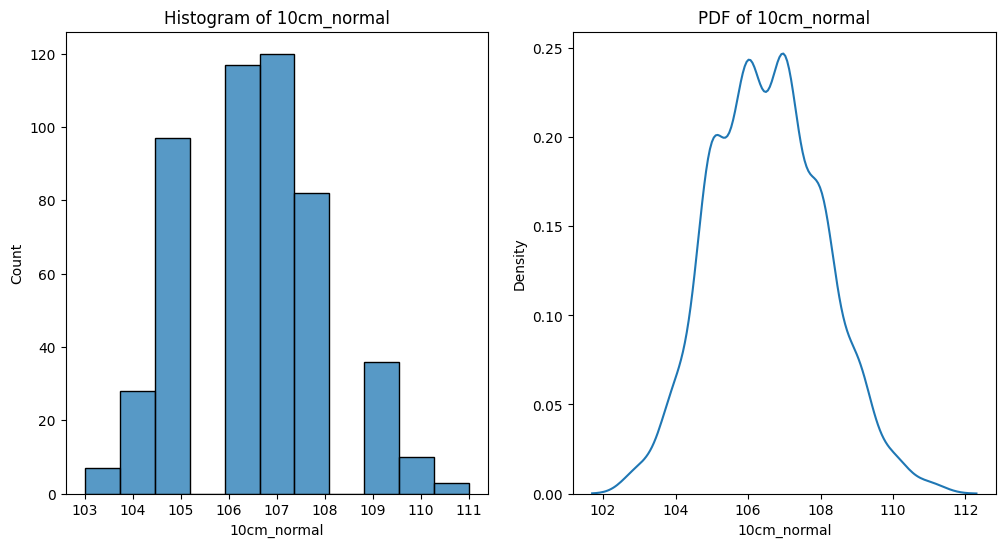

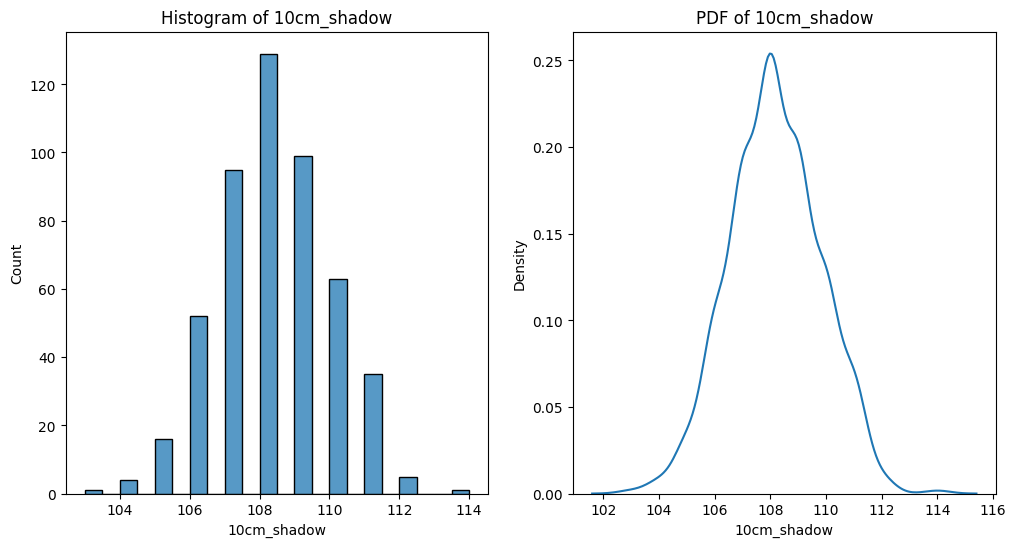

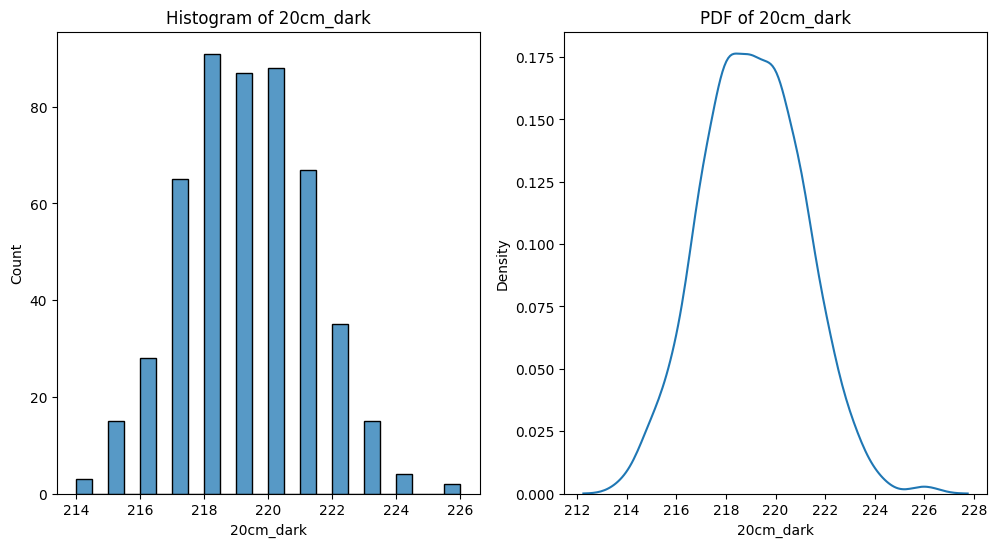

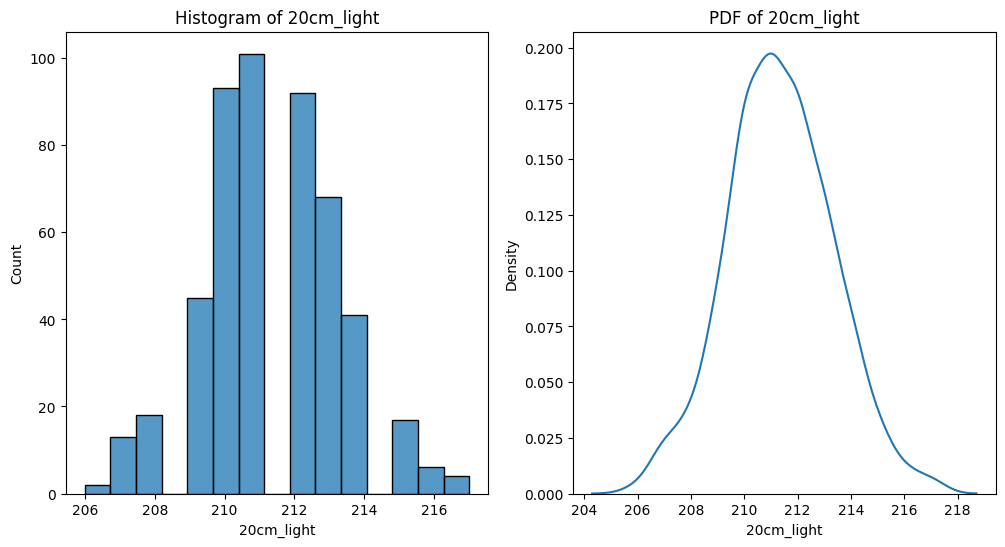

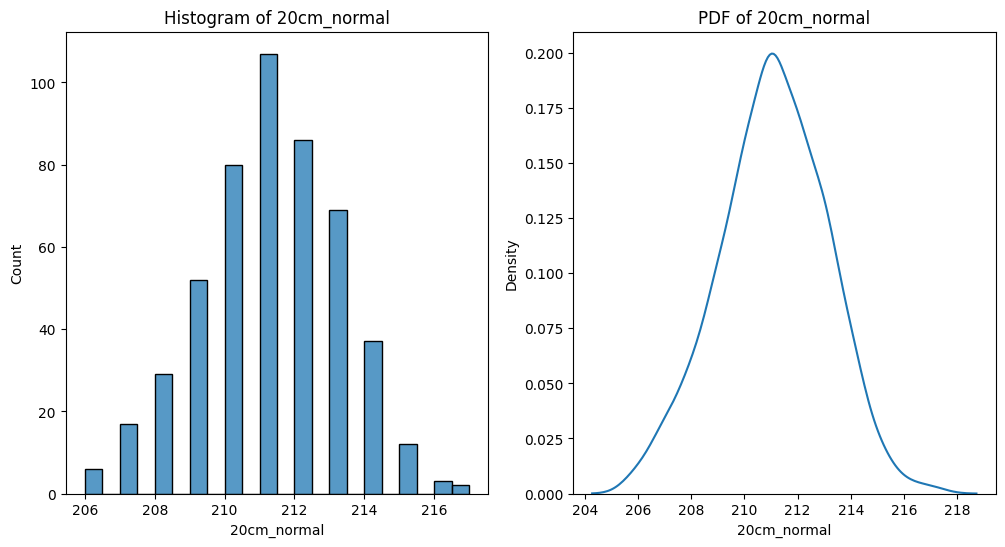

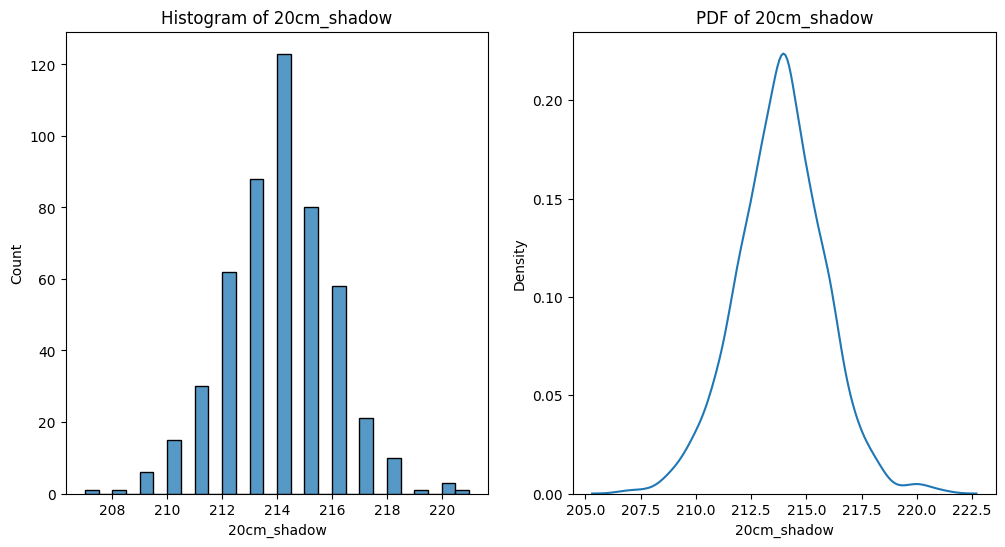

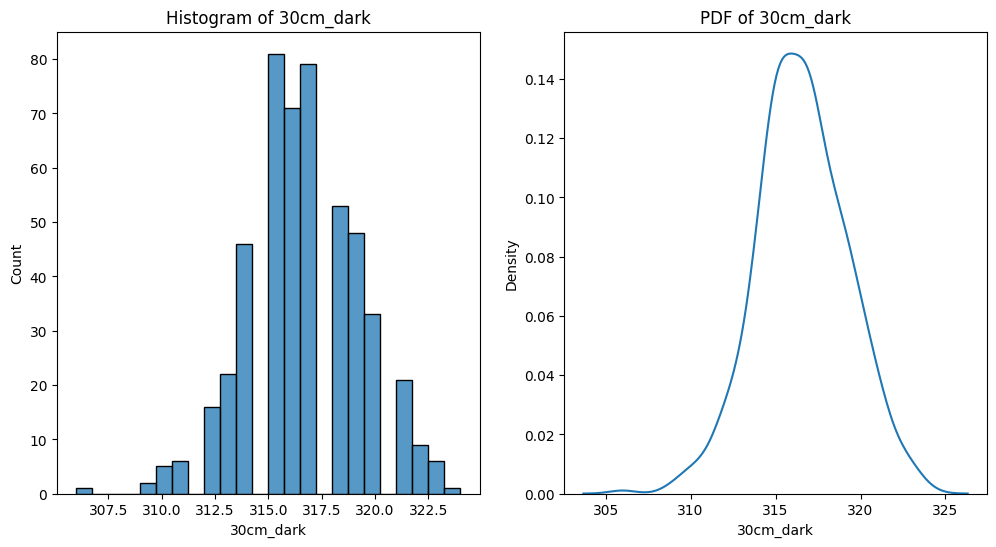

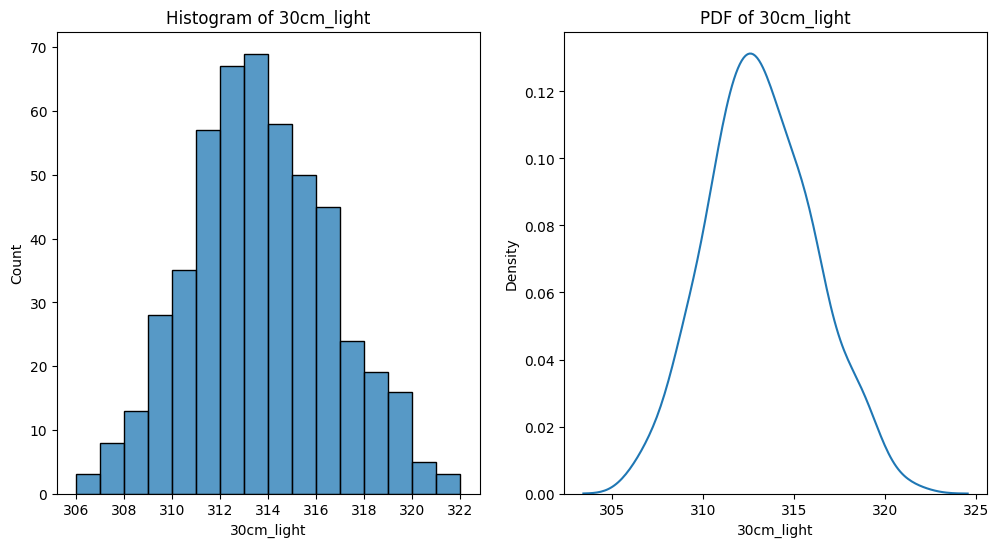

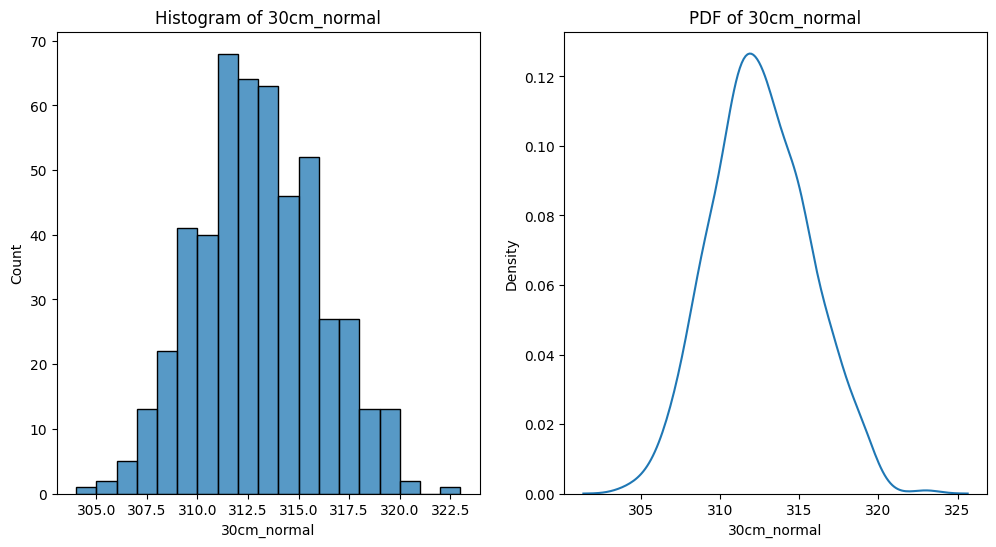

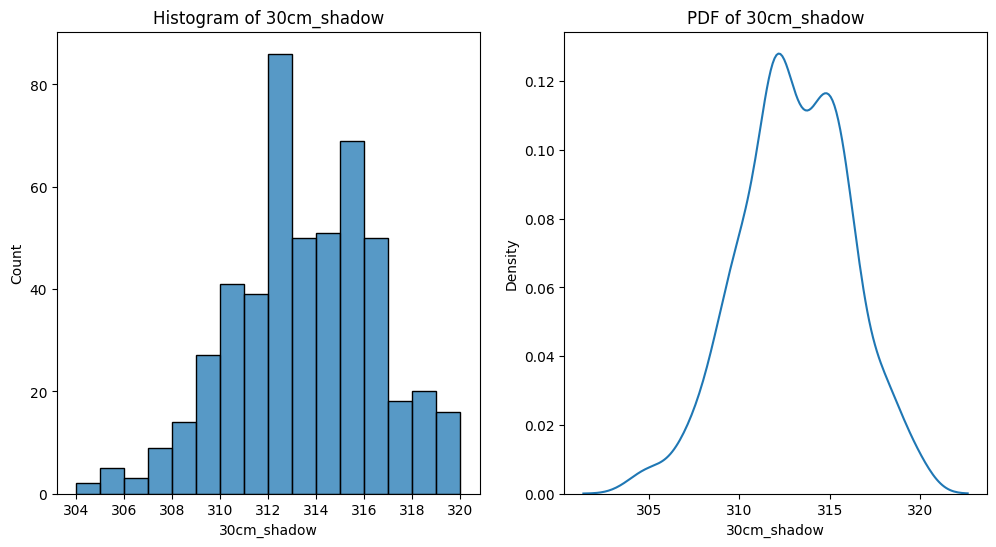

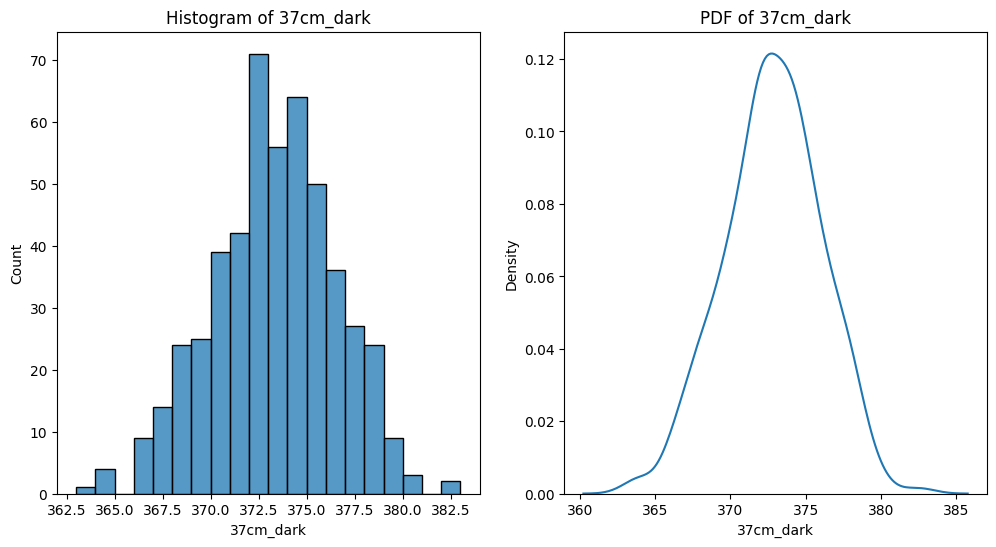

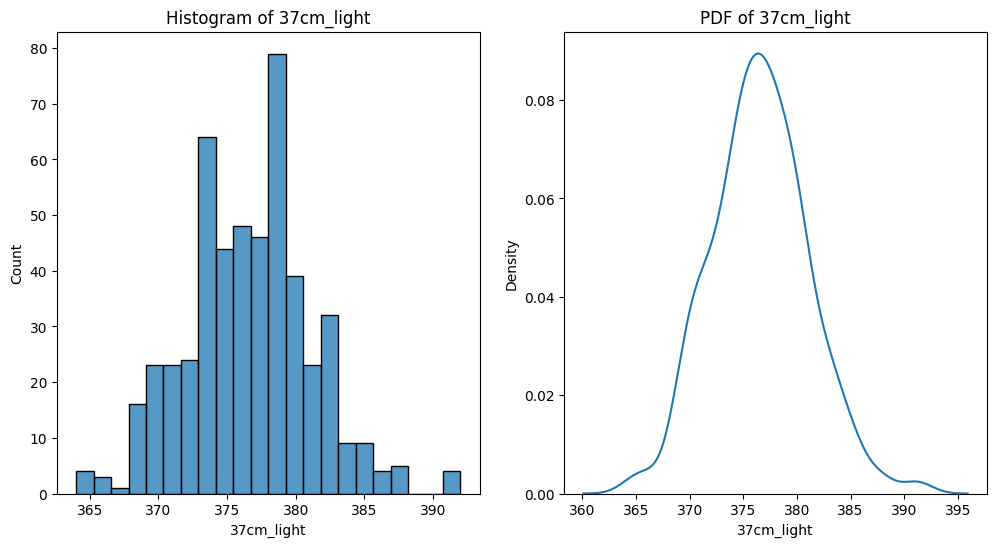

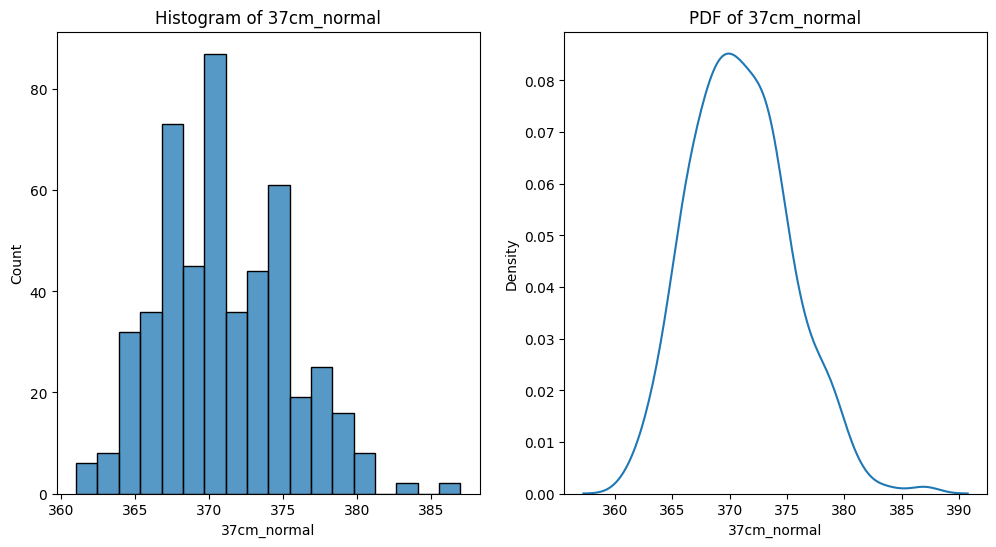

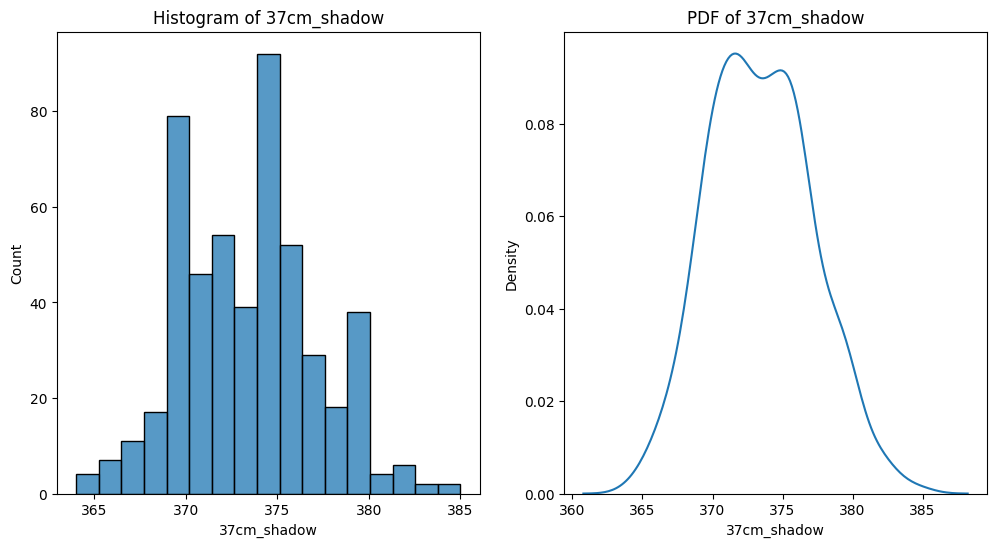

In [7]:
# Plot PDF and histogram for each column separately
for column in data.columns:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=False)
    plt.title(f'Histogram of {column}')

    # PDF
    plt.subplot(1, 2, 2)
    sns.kdeplot(data[column])
    plt.title(f'PDF of {column}')

    # Save the plots
    plt.savefig(f'../plots/{column}_hist_pdf.png')

    # Show the plots
    plt.show()
